# <center/>Customer Loan Approval Classification

<img src="https://agrimhfc.com/wp-content/uploads/2022/08/types-of-loans.png">

**In this project, The variable of "Loan Status" will be predicted by using the informations belonging to the clients. The project includes EDA, visualization process, classification methods and evaluations of models' performance by using various metrics.**

### <font color=darkblue>Data Dictionary

**The dataset consists of the following fields:**

**• Loan ID:** A unique Identifier for the loan information.

**• Customer ID:** A unique identifier for the customer. Customers may have more than one loan.

**• Loan Status:** A categorical variable indicating if the loan was paid back or defaulted.

**• Current Loan Amount:** This is the loan amount that was either completely paid off, or the amount that was defaulted.

**• Term:** A categorical variable indicating if it is a short term or long term loan.

**• Credit Score:** A value between 0 and 800 indicating the riskiness of the borrowers credit history.

**• Years in current job:** A categorical variable indicating how many years the customer has been in their current job.

**• Home Ownership:** Categorical variable indicating home ownership. Values are "Rent", "Home Mortgage", and "Own". If the 
value is OWN, then the customer is a home owner with no mortgage

**• Annual Income:** The customer's annual income

**• Purpose:** A description of the purpose of the loan.

**• Monthly Debt:** The customer's monthly payment for their existing loans

**• Years of Credit History:** The years since the first entry in the customer’s credit history • Months since last 
delinquent: Months since the last loan delinquent payment

**• Number of Open Accounts:** The total number of open credit cards

**• Number of Credit Problems:** The number of credit problems in the customer records.

**• Current Credit Balance:** The current total debt for the customer

**• Maximum Open Credit:** The maximum credit limit for all credit sources.

**• Bankruptcies:** The number of bankruptcies

**• Tax Liens:** The number of tax liens.



### PACKAGE AND DATA IMPORTING

In [34]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [35]:
df = pd.read_csv("LoansTrainingSet.csv")

C:\Users\HP\AppData\Local\Temp\ipykernel_8936\494856618.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("LoansTrainingSet.csv")


In [36]:
df.head() # The first 5 rows in the data 

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [37]:
df.shape # number of rows and columns

(256984, 19)

In [38]:
df.info() # variable types and missing value information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [39]:
df.describe() # Descriptive Statistics

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,13.500000,16.000000,8.000000,0.000000,5.974000e+03,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,17.000000,32.000000,10.000000,0.000000,1.107800e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,21.700000,51.000000,14.000000,0.000000,1.931900e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


**To give an example, The average credit score is roughly 1251.12, minimum value of Years of Credit History is 3.4 years.**

In [40]:
df.isnull().sum() # Missing values checking

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [41]:
data=df.isnull().sum() # total number of non-missing values 

for i in data :
    print(round(i/256984,2))

0.0
0.0
0.0
0.0
0.0
0.24
0.04
0.0
0.24
0.0
0.0
0.0
0.55
0.0
0.0
0.0
0.0
0.0
0.0


In [42]:
df["Loan Status"].value_counts() 

Loan Status
Fully Paid     176191
Charged Off     80793
Name: count, dtype: int64

**When we look at the output above:**

**176191 customers have completely  repaid the loan with no remaining balance.**

**80793 customers have failed to repay the loan and the lender has written it off as a loss.**

In [43]:
df["Term"].value_counts() # is the approval for short term loan or long term loan

Term
Short Term    192632
Long Term      64352
Name: count, dtype: int64

In [44]:
df["Years in current job"].value_counts() # How many years has the customer worked in the current job for 

Years in current job
10+ years    78896
2 years      23462
< 1 year     21012
3 years      20659
5 years      17864
1 year       16746
4 years      16166
6 years      14597
7 years      13968
8 years      12206
9 years       9932
Name: count, dtype: int64

In [45]:
df["Home Ownership"].value_counts() 

Home Ownership
Home Mortgage    124477
Rent             109010
Own Home          22923
HaveMortgage        574
Name: count, dtype: int64

In [46]:
df["Purpose"].value_counts()  # Why do the client make loan approval?

Purpose
Debt Consolidation      203911
Home Improvements        14915
other                    14268
Other                     9667
Business Loan             4712
Buy a Car                 3276
Medical Bills             2868
Take a Trip               1570
Buy House                 1530
Educational Expenses       267
Name: count, dtype: int64

In [47]:
df["Credit Score"]= df["Credit Score"].fillna(df["Credit Score"].median()) 
# fill the missing values in the variable of "Credit Score" with median

In [48]:
df["Years in current job"] = df["Years in current job"].fillna(df["Years in current job"].mode()[0])
# fill the missing values in the variable of "Years in current job" 
#because the number of the missing values in the variable is low

In [49]:
df["Annual Income"]= df["Annual Income"].fillna(df["Annual Income"].median()) # fill the missing values with median

In [50]:
df["Credit Score"]= df["Credit Score"].fillna(df["Credit Score"].median()) # fill the missing values with median

In [51]:
df["Months since last delinquent"]= df["Months since last delinquent"].fillna(df["Months since last delinquent"].median())
# fill the missing values with median

In [52]:
df["Bankruptcies"]= df["Bankruptcies"].fillna(df["Bankruptcies"].median())

In [53]:
df["Tax Liens"]= df["Tax Liens"].fillna(df["Tax Liens"].median())

In [54]:
df.isnull().sum() # As we see in the output following, all the missing values has been filled now 

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Years in current job            0
Home Ownership                  0
Annual Income                   0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [55]:
df["Home Ownership"] = df["Home Ownership"].replace({"Home Mortgage": "Mortgage", "HaveMortgage": "Mortgage"})

# We fixed some corrupted data

In [56]:
df["Home Ownership"].value_counts() # after editing the variable, The number of the categories in the Home ownership variable 

Home Ownership
Mortgage    125051
Rent        109010
Own Home     22923
Name: count, dtype: int64

In [57]:
df["Purpose"] =df["Purpose"].replace({"other": "Other"}) # we replaced the "other" to "Other"

In [58]:
df["Purpose"].value_counts() # # the reason for loan approval 

Purpose
Debt Consolidation      203911
Other                    23935
Home Improvements        14915
Business Loan             4712
Buy a Car                 3276
Medical Bills             2868
Take a Trip               1570
Buy House                 1530
Educational Expenses       267
Name: count, dtype: int64

In [59]:
df.info() #Variables types ---> object: categorical, int: numerical, float: numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  256984 non-null  float64
 6   Years in current job          256984 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 256984 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  256984 non-nul

In [60]:
df['Monthly Debt'] = df['Monthly Debt'].str.replace('$', '', regex=False) 

# we have removed the symbol of dollar in order to use the values as numerical values 

In [61]:
df["Monthly Debt"].head()

0       584.03
1    1,106.04 
2    1,321.85 
3       751.92
4       355.18
Name: Monthly Debt, dtype: object

In [62]:
df["Monthly Debt"] = df["Monthly Debt"].str.replace(',', '.').str.strip()
# We have changed comma to point 

In [63]:
df["Monthly Debt"] = df["Monthly Debt"].str.replace('.', '', regex=False)  # remove thousands separator
df["Monthly Debt"] = df["Monthly Debt"].str.replace(',', '.', regex=False)  # replace the comma to the thousands separator


In [64]:
df["Monthly Debt"] = df["Monthly Debt"].astype(float) # change the object variable to float (categorical to numerical)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  256984 non-null  float64
 6   Years in current job          256984 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 256984 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  float64
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  256984 non-nul

In [ ]:
# df["Maximum Open Credit"] = df["Maximum Open Credit"].astype(int) ##### ERROR MESSAGE

**When the code above is run, we can not transform the object to the integer because according to the error message, there is an undefined value exists in the form "VALUE!". We should change from this value to "nan" (nan: missing value):**

In [67]:
df["Maximum Open Credit"] = df["Maximum Open Credit"].replace('#VALUE!', float('nan'))


In [68]:
df["Maximum Open Credit"].info() # You can see that the variable type has been cahnged 

<class 'pandas.core.series.Series'>
RangeIndex: 256984 entries, 0 to 256983
Series name: Maximum Open Credit
Non-Null Count   Dtype 
--------------   ----- 
256980 non-null  object
dtypes: object(1)
memory usage: 2.0+ MB


In [69]:
medyan = df["Maximum Open Credit"].median() # median of the variable 

In [70]:
df["Maximum Open Credit"].isnull().sum() # the number of missing values in the variable 

4

In [71]:
df["Maximum Open Credit"] = df["Maximum Open Credit"].fillna(medyan) # fill the missing values in the variable with median 

In [72]:
df["Maximum Open Credit"].isnull().sum() # check again the missing values 

0

In [73]:
df["Maximum Open Credit"]=df["Maximum Open Credit"].astype(int) # integer transformation for the variable type 

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  256984 non-null  float64
 6   Years in current job          256984 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 256984 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  float64
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  256984 non-nul

In [75]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Mortgage,33694.0,Debt Consolidation,58403.0,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Mortgage,42269.0,Other,110604.0,26.3,32.0,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Mortgage,90126.0,Debt Consolidation,132185.0,28.8,32.0,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,75192.0,26.2,32.0,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,35518.0,11.5,32.0,12,0,17391,37081,0.0,0.0


In [76]:
df.duplicated().sum() # the total number of repeated rows in the data 

16611

In [77]:
df = df.drop_duplicates() # drop the repeated rows in the data 

In [78]:
d = {"Charged Off":0, "Fully Paid":1} # transform the labels of categories in the variable 

In [79]:
df["Loan Status"] = df["Loan Status"].map(d) # apply the transformation by using map() function

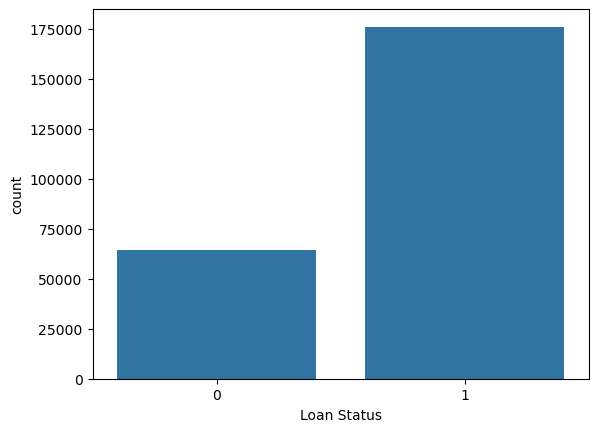

In [81]:
sns.countplot(x=df["Loan Status"]); # Frequences of observations for each category in the "Loan Status" variable 

In [82]:
abs(df.corr(numeric_only=True)["Loan Status"]).sort_values() 
# The correlations between for the "Loan Status" and the other independent variables

Bankruptcies                    0.001906
Maximum Open Credit             0.007077
Current Credit Balance          0.008981
Number of Credit Problems       0.009109
Tax Liens                       0.012524
Months since last delinquent    0.013519
Monthly Debt                    0.015191
Number of Open Accounts         0.020394
Years of Credit History         0.035197
Annual Income                   0.062979
Current Loan Amount             0.250020
Credit Score                    0.417770
Loan Status                     1.000000
Name: Loan Status, dtype: float64

### t-Test

**H0: There is not any meaningful relationship between the two variables.**

**H1: There is a meaningful relationship between the two variables.**

**If p-value is less than 0.05, H0 is rejected.**

In [84]:
_,p = ttest_ind(df["Loan Status"], df["Bankruptcies"])
p<0.05 # A meaningful relationsgip is available

True

In [85]:
_,p = ttest_ind(df["Loan Status"], df["Maximum Open Credit"])
p<0.05 # A meaningful relationship is available 

True

In [86]:
_,p = ttest_ind(df["Loan Status"], df["Current Credit Balance"])
p<0.05 # A meaningful relationship is available 

True

In [87]:
_,p = ttest_ind(df["Loan Status"], df["Number of Credit Problems"])
p<0.05 # A meaningful relationship is available 

True

In [88]:
_,p = ttest_ind(df["Loan Status"], df["Tax Liens"])
p<0.05 # A meaningful relationship is available 

True

In [89]:
_,p = ttest_ind(df["Loan Status"], df["Months since last delinquent"])
p<0.05 # A meaningful relationship is available 

True

In [90]:
_,p = ttest_ind(df["Loan Status"], df["Monthly Debt"])
p<0.05 # A meaningful relationship is available 

True

In [91]:
_,p = ttest_ind(df["Loan Status"], df["Number of Open Accounts"])
p<0.05 # A meaningful relationship is available  

True

In [92]:
_,p = ttest_ind(df["Loan Status"], df["Years of Credit History"])
p<0.05 # A meaningful relationship is available 

True

In [93]:
_,p = ttest_ind(df["Loan Status"], df["Annual Income"])
p<0.05 # A meaningful relationship is available 

True

**To split the data into the features (X) and the target (Y) variables:**

In [95]:
y= df["Loan Status"] 
x=df.drop(["Loan Status", "Loan ID", "Customer ID"], axis=1) # drop the unnecessary columns and the target variable
x = pd.get_dummies(x, drop_first=True) # dummy transformation for the categorical independent variables  

In [96]:
x.columns # checking of the column names

Index(['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens', 'Term_Short Term', 'Years in current job_10+ years',
       'Years in current job_2 years', 'Years in current job_3 years',
       'Years in current job_4 years', 'Years in current job_5 years',
       'Years in current job_6 years', 'Years in current job_7 years',
       'Years in current job_8 years', 'Years in current job_9 years',
       'Years in current job_< 1 year', 'Home Ownership_Own Home',
       'Home Ownership_Rent', 'Purpose_Buy House', 'Purpose_Buy a Car',
       'Purpose_Debt Consolidation', 'Purpose_Educational Expenses',
       'Purpose_Home Improvements', 'Purpose_Medical Bills', 'Purpose_Other',
       'Purpose_Take a Trip'],
      dtype='object')

In [97]:
y.shape # the number of observations in the target column

(240373,)

In [98]:
x.shape # the numbers of the rows and the columns in the features data 

(240373, 33)

**TEST & TRAIN DATA**

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


**MODELLING**

In [101]:
g = GaussianNB() # Gaussian Naive Bayesian Classifier Model
gmodel =g.fit(x_train, y_train) # training (fitting) the data
gtahmin = g.predict(x_test) # predictions for y_test 

In [102]:
accuracy_score(gtahmin, y_test) # Model prediction performance metrics

0.4208216328653146

**According to the accuracy score above, Gaussian model predicted almost 42% of the classes of the target variable correctly**

**The model performance is low.**

In [103]:
confusion_matrix(gtahmin, y_test)

array([[12883, 27782],
       [   62,  7348]], dtype=int64)

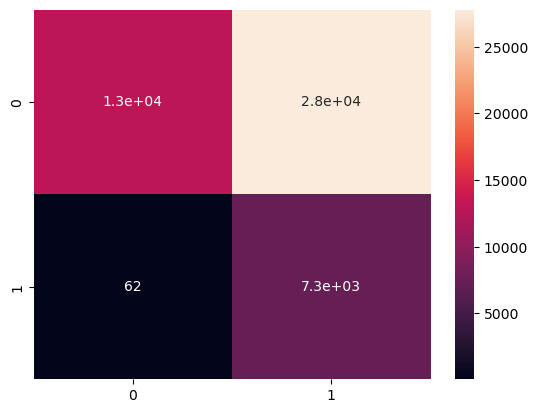

In [104]:
sns.heatmap(confusion_matrix(gtahmin, y_test), annot=True); # Heatmap of correct and correct predictions for every classes 

In [105]:
print(classification_report(gtahmin, y_test))

              precision    recall  f1-score   support

           0       1.00      0.32      0.48     40665
           1       0.21      0.99      0.35      7410

    accuracy                           0.42     48075
   macro avg       0.60      0.65      0.41     48075
weighted avg       0.87      0.42      0.46     48075



**All of the values in the class 0 are predicted correctly but the model is unsuccessful in the predictions of the class 1.**

**21% of the values in the class 1 is predicted correctly.**

In [106]:
b = BernoulliNB() # Bernoulli Naive Bayesian Classification Model
bmodel = b.fit(x_train, y_train) # Train the model
btahmin = b.predict(x_test) # get the predictions

In [107]:
accuracy_score(btahmin, y_test)

0.7309204368174727

**Classification model performance increased. Bernoulli Model predicted 73% of the classes correctly.**

In [109]:
confusion_matrix(btahmin, y_test) # Class 0 was not predicted good by the Bernoulli Model, despite the high accuracy score

array([[   34,    25],
       [12911, 35105]], dtype=int64)

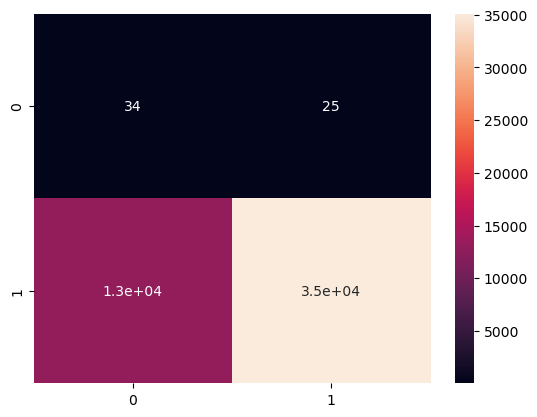

In [110]:
sns.heatmap(confusion_matrix(btahmin, y_test), annot=True); 

# heatmap of the number correct and correct predictions for classes 

In [111]:
print(classification_report(btahmin, y_test)) # Approximately none of the zeros was predicted uncorrectly

              precision    recall  f1-score   support

           0       0.00      0.58      0.01        59
           1       1.00      0.73      0.84     48016

    accuracy                           0.73     48075
   macro avg       0.50      0.65      0.42     48075
weighted avg       1.00      0.73      0.84     48075



In [113]:
l =LogisticRegression() # Logistic Regression Model
l.fit(x_train, y_train) # training of the model by using train sets
ltahmin = l.predict(x_test) # predictions 

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [114]:
accuracy_score(ltahmin, y_test) # the model performance score has increased more than others above 

0.7911388455538222

In [115]:
confusion_matrix(ltahmin, y_test)

array([[ 2956,    52],
       [ 9989, 35078]], dtype=int64)

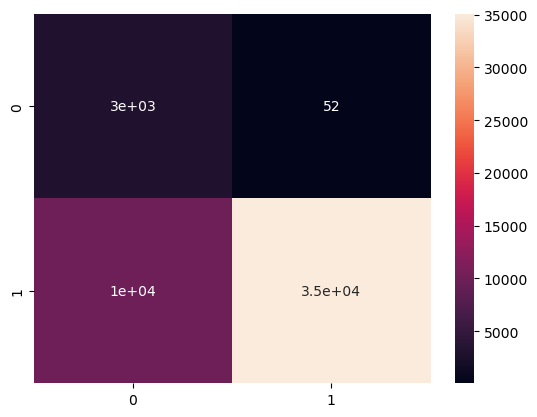

In [116]:
sns.heatmap(confusion_matrix(ltahmin, y_test), annot=True);

In [117]:
print(classification_report(ltahmin, y_test))

              precision    recall  f1-score   support

           0       0.23      0.98      0.37      3008
           1       1.00      0.78      0.87     45067

    accuracy                           0.79     48075
   macro avg       0.61      0.88      0.62     48075
weighted avg       0.95      0.79      0.84     48075



In [119]:
d = DecisionTreeClassifier() #Decision Tree Classifier Model 
d.fit(x_train, y_train)
dtahmin =d.predict(x_test)


In [120]:
accuracy_score(dtahmin, y_test)

0.7235985439417577

In [121]:
confusion_matrix(dtahmin, y_test)

array([[ 6630,  6973],
       [ 6315, 28157]], dtype=int64)

In [122]:
print(classification_report(dtahmin, y_test))

              precision    recall  f1-score   support

           0       0.51      0.49      0.50     13603
           1       0.80      0.82      0.81     34472

    accuracy                           0.72     48075
   macro avg       0.66      0.65      0.65     48075
weighted avg       0.72      0.72      0.72     48075



In [124]:
r = RandomForestClassifier() # Random Forest Classifier
r.fit(x_train, y_train)
rtahmin = r.predict(x_test)

In [125]:
confusion_matrix(rtahmin, y_test)

array([[ 4769,   999],
       [ 8176, 34131]], dtype=int64)

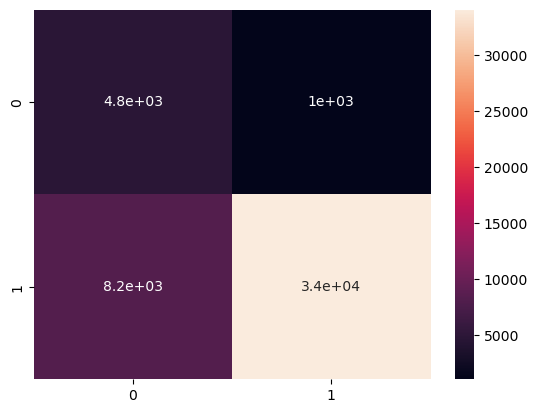

In [130]:
sns.heatmap(confusion_matrix(rtahmin, y_test), annot=True);

In [127]:
accuracy_score(rtahmin, y_test)

0.8081955278211128

In [128]:
print(classification_report(rtahmin, y_test))

              precision    recall  f1-score   support

           0       0.37      0.82      0.51      5802
           1       0.97      0.81      0.88     42273

    accuracy                           0.81     48075
   macro avg       0.67      0.81      0.69     48075
weighted avg       0.90      0.81      0.84     48075



In [132]:
gb = GradientBoostingClassifier() # Gradient Boosting Classifier Model
gb.fit(x_train, y_train)
gbtahmin = gb.predict(x_test)

In [133]:
accuracy_score(gbtahmin, y_test)

0.7951118044721789

In [134]:
confusion_matrix(gbtahmin, y_test)

array([[ 3670,   575],
       [ 9275, 34555]], dtype=int64)

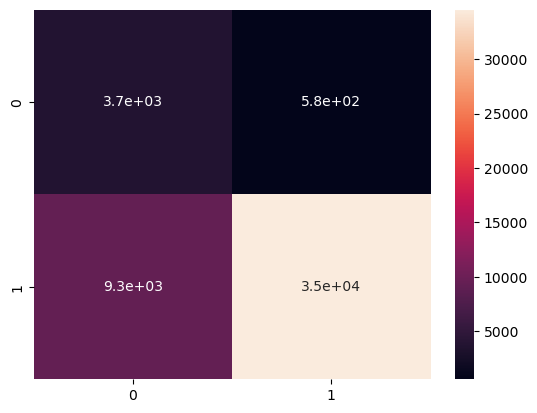

In [136]:
sns.heatmap(confusion_matrix(gbtahmin, y_test), annot=True);

In [137]:
print(classification_report(gbtahmin, y_test))

              precision    recall  f1-score   support

           0       0.28      0.86      0.43      4245
           1       0.98      0.79      0.88     43830

    accuracy                           0.80     48075
   macro avg       0.63      0.83      0.65     48075
weighted avg       0.92      0.80      0.84     48075



In [148]:
kn = KNeighborsClassifier() # K-Neighbors Classifier Model 
kn.fit(x_train, y_train)
kntahmin = kn.predict(np.array(x_test))

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [149]:
accuracy_score(kntahmin, y_test)

0.7459386375455018

In [150]:
confusion_matrix(kntahmin, y_test)

array([[ 4355,  3624],
       [ 8590, 31506]], dtype=int64)

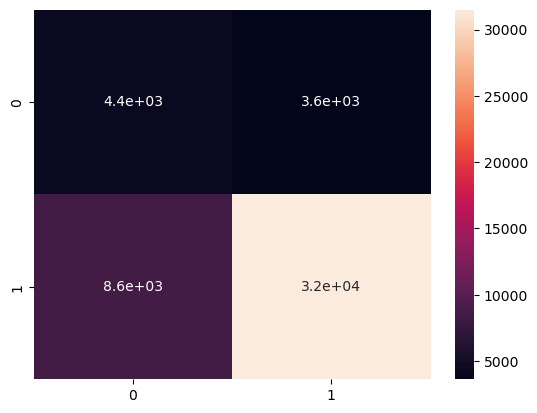

In [151]:
sns.heatmap(confusion_matrix(kntahmin, y_test), annot=True);

In [152]:
print(classification_report(kntahmin, y_test))

              precision    recall  f1-score   support

           0       0.34      0.55      0.42      7979
           1       0.90      0.79      0.84     40096

    accuracy                           0.75     48075
   macro avg       0.62      0.67      0.63     48075
weighted avg       0.80      0.75      0.77     48075



**The best performance belongs to the Random Forest Classifier Model, altough there are other models whose accuracy scores are higher than the random forest model's.**

**Because The Random Forest model are more successful on the prediction of class 0 than the other models.**

In [155]:
# The predictions of Random Forest Model
pd.DataFrame(rtahmin)

,0
0,1
1,1
2,1
3,1
4,1
...,...
48070,0
48071,1
48072,1
48073,1
